Aclaración
---------------

Los puntos del trabajo práctico se pueden ejecutar por separado, no es necesario ejecutar todas las celdas anteriores, solamente son necesarias las que se encuentran antes del Punto 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Método de Euler
---------------


In [2]:
def euler (f,h,y0,t0,tf):
    i = 0
    y_array = [y0]
    t_array = [t0]
    t = t0
    y = y0
    while (t <= tf):
        y = y + h*f(t,y)
        t = t+h
        y_array.append(y)
        t_array.append(t)
    return [y_array,t_array]    
    
    

In [3]:
def g (t,y):
    return t*np.cos(y+t**3)+np.log(y*t+2)

In [4]:
a = euler(g,0.001,0,0,3)

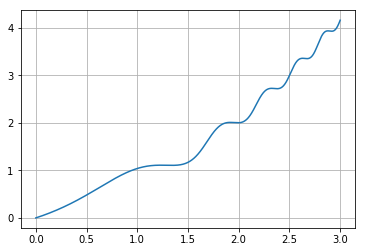

In [5]:
plt.plot(a[1],a[0])
plt.grid(True)

Método de Runge-Kutta de orden 4
--------------------------------


In [6]:
def rk4 (f,h,y0,t0,tf):
    y_array = [y0]
    t_array = [t0]
    y = y0
    t = t0
    while t <= tf :
        k1 = f(t,y)
        k2 = f(t+(h/2),y+((h/2)*k1))
        k3 = f(t+(h/2),y+((h/2)*k2))
        k4 = f(t+h,y+(h*k3))
        y = y+((h/6)*(k1+(2*k2)+(2*k3)+k4))
        t += h
        y_array.append(y)
        t_array.append(t)
    return [y_array,t_array]

In [7]:
b = rk4(g,0.01,0,0,3)

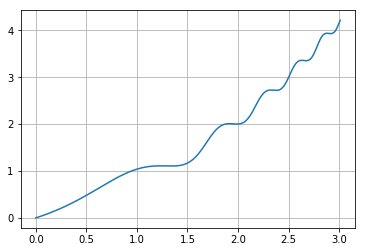

In [8]:
plt.plot(b[1],b[0])
plt.grid(True)

Punto 1
-------



### Datos

In [20]:
def f (t,T):
    return ((((-hc)*s) / (m*C)) * (T-T_inf(t,T1,T2)))

def T_inf (t,T1,T2):
    x = v0*t
    if x<=(L/2):
        return T1
    else:
        return T2

In [17]:
p = 7850
C = 480
OD = 0.24448  
WT = 0.01384
Lt = 12
L = 50
nbol = 50
cad = 24
T1 = 986
T2 = T1
hc = 20
o = 0.000000056703
e = 0.85

v0 = L/(nbol*cad)
tf = L/v0

In [18]:
m = p*np.pi*OD*WT*(1-(WT/OD))*Lt
s = np.pi*OD*Lt

In [21]:
rk4_1 = rk4(f,cad,293.15,0,tf)

In [22]:
euler_1 = euler(f,cad,293.15,0,tf)

In [23]:
def solution_1(t):
    return T_inf(t,T1,T2)+((293.15-T_inf(t,T1,T2))*(np.e**((((-(hc*s))/(m*C)))*t)))
real_sol_1 = [[],[]]
real_sol_1[1] = euler_1[1]
for i in real_sol_1[1]:
    real_sol_1[0].append(solution_1(i))

1a
---

In [24]:
rk4_1_celsius = np.array(rk4_1[0])-273.15
euler_1_celsius = np.array(euler_1[0])-273.15
real_sol_1_celsius = np.array(real_sol_1[0])-273.15
x_min = np.array(rk4_1[1])/60 #todos los x son iguales

Text(0.5,0,'Minutos')

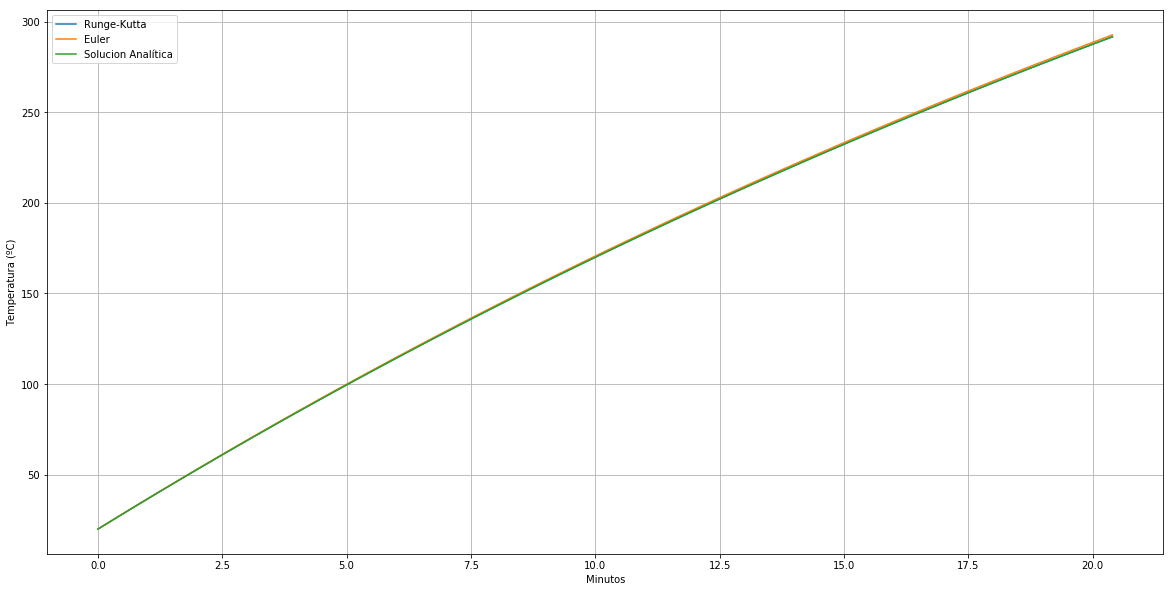

In [27]:
fig,ax = plt.subplots(figsize=(20,10))
sns.lineplot(x=x_min,y=rk4_1_celsius,label='Runge-Kutta')
sns.lineplot(x=x_min,y=euler_1_celsius,label='Euler')
sns.lineplot(x=x_min,y=real_sol_1_celsius,label='Solucion Analítica')
plt.grid(True)
plt.ylabel('Temperatura (ºC)')
plt.xlabel('Minutos')

1b
---

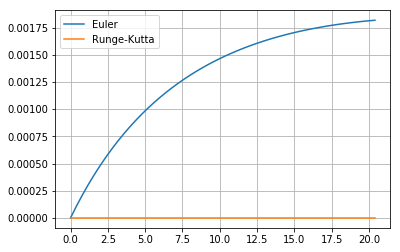

In [28]:
diff_rk4_1 = np.array(rk4_1[0])-np.array(real_sol_1[0])
diff_euler_1 = (np.array(euler_1[0])-np.array(real_sol_1[0]))/np.array(euler_1[0])
sns.lineplot(x=x_min,y=diff_euler_1,label='Euler')
sns.lineplot(x=x_min,y=diff_rk4_1,label='Runge-Kutta')
plt.grid(True)

1c
---

La conclusión es que el método de Runge-Kutta de orden 4 es mucho mejor que el de Euler ya que tiene un orden de convergencia mayor y permite obtener resultados exactos en ciertos casos.

Punto 2
-------



### Datos

In [9]:
p = 7850
C = 480
OD = 0.24448  
WT = 0.01384
Lt = 12
L = 50
nbol = 50
cad = 24
T1 = 986
T2 = T1
hc = 20
o = 5.6703*(10**(-8))
e = 0.85

v0 = L/(nbol*cad)
tf = L/v0

In [10]:
m = p*np.pi*OD*WT*(1-(WT/OD))*Lt
s = np.pi*OD*Lt

In [11]:
def f (t,T):
    return ((((-hc)*s) / (m*C)) * (T-T_inf(t,T1,T2))) - (((o*e*s)*((T**4) - (T_inf(t,T1,T2)**4)))/(m*C))

def T_inf (t,T1,T2):
    x = v0*t
    if x<=(L/2):
        return T1
    else:
        return T2

2a
---
Elegimos el método de Runge-Kutta porque es el método que funcionó mejor para el ítem 1 (dió cero error)

In [12]:
rk4_2 = rk4(f,cad,293.15,0,tf)

In [13]:
def solution_2(t):
    return T_inf(t,T1,T2)+((293.15-T_inf(t,T1,T2))*(np.e**((((-(hc*s))/(m*C)))*t)))
real_sol_2 = [[],[]]
real_sol_2[1] = rk4_2[1]
for i in real_sol_2[1]:
    real_sol_2[0].append(solution_2(i))

2b
----

In [29]:
rk4_2_celsius = np.array(rk4_2[0])-273.15
real_sol_2_celsius = np.array(real_sol_2[0])-273.15
x_min_2 = np.array(rk4_2[1])/60 #todos los x son iguales

Text(0.5,0,'Minutos')

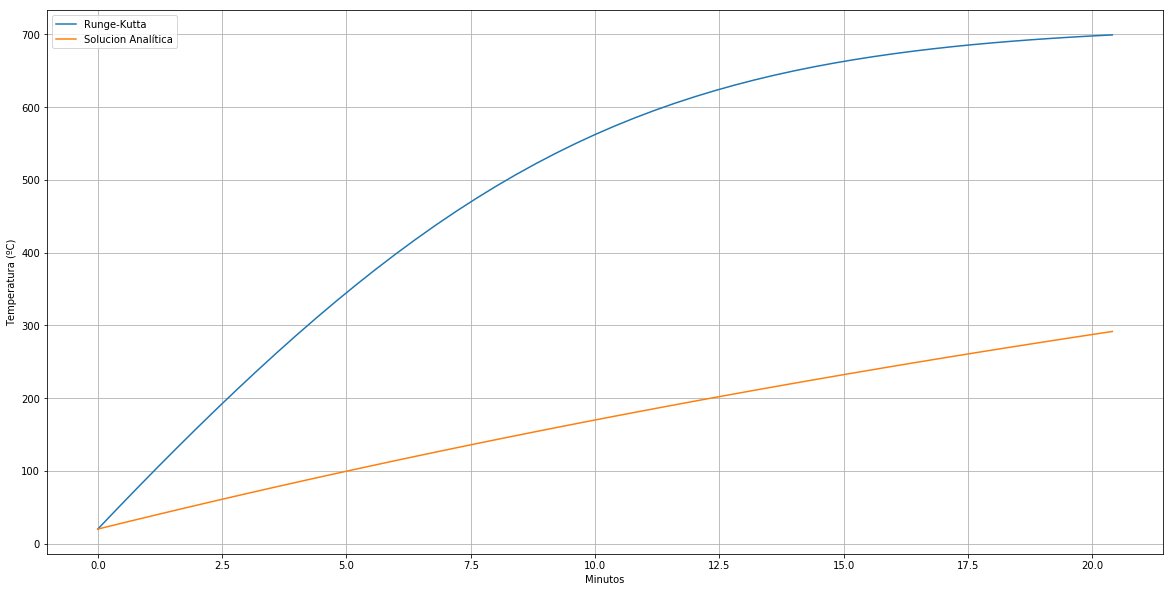

In [31]:
fig,ax = plt.subplots(figsize=(20,10))
sns.lineplot(x=x_min_2,y=rk4_2_celsius,label='Runge-Kutta')
sns.lineplot(x=x_min_2,y=real_sol_2_celsius,label='Solucion Analítica')
plt.grid(True)
plt.ylabel('Temperatura (ºC)')
plt.xlabel('Minutos')

Vemos que el intercambio de radiación **NO** es despreciable

2c
--

In [39]:
for i,v in enumerate(rk4_2_celsius):
    if v >= (rk4_2_celsius[len(rk4_2_celsius)-1] - 10):
        index = i
        break

sk =  x_min_2[len(x_min_2)-1] - x_min_2[index]
tsk = np.mean(rk4_2_celsius[index:])

Soaking en minutos:

In [40]:
sk

2.0

Temperatura promedio durante el soaking en ºC

In [41]:
tsk

695.1501077479244

Punto 3
-----------

### Parámetros fijos

In [133]:
p = 7850
C = 480
OD = 0.24448  
WT = 0.01384
Lt = 12
L = 50
nbol = 50
cad = 24
hc = 20
o = 5.6703*(10**(-8))
e = 0.85

v0 = L/(nbol*cad)
tf = L/v0

In [134]:
m = p*np.pi*OD*WT*(1-(WT/OD))*Lt
s = np.pi*OD*Lt

### Modelo Numérico

In [135]:
def soaking (T_inf_1,T_inf_2):
    def f (t,T):
        return ((((-hc)*s) / (m*C)) * (T-T_inf(t,T1,T2))) - (((o*e*s)*((T**4) - (T_inf(t,T1,T2)**4)))/(m*C))

    def T_inf (t,T1,T2):
        x = v0*t
        if x<=(L/2):
            return T1
        else:
            return T2
        
        
    T1 = T_inf_1
    T2 = T_inf_2
    rk4_3 = rk4(f,cad,293.15,0,tf)
    rk4_3_celsius = np.array(rk4_3[0])-273.15
    x_min_3 = np.array(rk4_3[1])/60 #todos los x son iguales
    
    for i,v in enumerate(rk4_3_celsius):
        if v >= (rk4_3_celsius[len(rk4_3_celsius)-1] - 10):
            index = i
            break

    sk =  x_min_3[len(x_min_3)-1] - x_min_3[index]
    tsk = np.mean(rk4_3_celsius[index:])
    
    sns.lineplot(x=x_min_3,y=rk4_3_celsius)
    plt.grid(True)
    print("Soaking: "+str(sk)+" minutos")
    print("Temperatura promedio de soaking: "+str(tsk)+ " ºC")

### Resultados

Soaking: 10.399999999999999 minutos
Temperatura promedio de soaking: 695.5523115470097 ºC


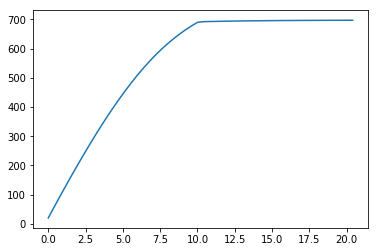

In [136]:
soaking(1070,971)

Punto 4
-----------

In [138]:
p = 7850
C = 480
OD = 0.24448  
WT = 0.01384
Lt = 12
L = 50
nbol = 50
hc = 20
o = 5.6703*(10**(-8))
e = 0.85



In [139]:
m = p*np.pi*OD*WT*(1-(WT/OD))*Lt
s = np.pi*OD*Lt

### Modelo Numérico

In [161]:
def soaking (T_inf_1,T_inf_2,cadencia):
    def f (t,T):
        return ((((-hc)*s) / (m*C)) * (T-T_inf(t,T1,T2))) - (((o*e*s)*((T**4) - (T_inf(t,T1,T2)**4)))/(m*C))

    def T_inf (t,T1,T2):
        x = v0*t
        if x<=(L/2):
            return T1
        else:
            return T2
        
    cad = cadencia

    v0 = L/(nbol*cad)
    tf = L/v0
    print('Tiempo final: '+str(tf/60)+' minutos')
    T1 = T_inf_1
    T2 = T_inf_2
    rk4_4 = rk4(f,cad,293.15,0,tf)
    rk4_4_celsius = np.array(rk4_4[0])-273.15
    x_min_4 = np.array(rk4_4[1])/60 #todos los x son iguales
    
    for i,v in enumerate(rk4_4_celsius):
        if v >= (rk4_4_celsius[len(rk4_4_celsius)-1] - 10):
            index = i
            break

    sk =  x_min_4[len(x_min_4)-1] - x_min_4[index]
    tsk = np.mean(rk4_4_celsius[index:])
    
    sns.lineplot(x=x_min_4,y=rk4_4_celsius)
    plt.grid(True)
    print("Soaking: "+str(sk)+" minutos")
    print("Temperatura promedio de soaking: "+str(tsk)+ " ºC")

Tiempo final: 19.166666666666668 minutos
Soaking: 9.966666666666667 minutos
Temperatura promedio de soaking: 695.3648837264176 ºC


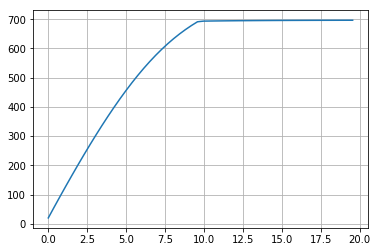

In [162]:
soaking(1079,970,23)

Punto 5
-----------

### Parámetros fijos

In [133]:
p = 7850
C = 480
OD = 0.24448  
WT = 0.01384
Lt = 12
L = 50
nbol = 50
cad = 24
hc = 20
o = 5.6703*(10**(-8))
e = 0.85

v0 = L/(nbol*cad)
tf = L/v0

In [134]:
m = p*np.pi*OD*WT*(1-(WT/OD))*Lt
s = np.pi*OD*Lt

### Modelo Numérico

In [135]:
def soaking (T_inf_1,T_inf_2):
    def f (t,T):
        return ((((-hc)*s) / (m*C)) * (T-T_inf(t,T1,T2))) - (((o*e*s)*((T**4) - (T_inf(t,T1,T2)**4)))/(m*C))

    def T_inf (t,T1,T2):
        x = v0*t
        if x<=(L/2):
            return T1
        else:
            return T2
        
        
    T1 = T_inf_1
    T2 = T_inf_2
    rk4_5 = rk4(f,cad,293.15,0,tf)
    rk4_5_celsius = np.array(rk4_5[0])-273.15
    x_min_5 = np.array(rk4_5[1])/60 #todos los x son iguales
    
    for i,v in enumerate(rk4_5_celsius):
        if v >= (rk4_5_celsius[len(rk4_5_celsius)-1] - 10):
            index = i
            break

    sk =  x_min_5[len(x_min_5)-1] - x_min_5[index]
    tsk = np.mean(rk4_5_celsius[index:])
    
    sns.lineplot(x=x_min_5,y=rk4_5_celsius)
    print("Soaking: "+str(sk)+" minutos")
    print("Temperatura promedio de soaking: "+str(tsk)+ " ºC")

### Resultados

Soaking: 10.399999999999999 minutos
Temperatura promedio de soaking: 695.5523115470097 ºC


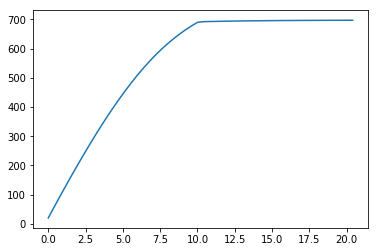

In [136]:
soaking(1070,971)